In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/cpu.csv')

In [ ]:
new = []
for x in df['Name']:
  x = x.replace('\n', '')
  new.append(x)
  #x.strip() обрежет все ненужное

In [ ]:
df['Name']=new

In [ ]:
df.head()

Name    Codename       Socket  ...  Min Clock Max Clock  Socket_ID
0    Ryzen 5 3600     Matisse   Socket AM4  ...        3.6       4.2          1
1   Ryzen 5 5600X     Vermeer   Socket AM4  ...        3.7       4.6          1
2   Ryzen 5 5600G     Cezanne   Socket AM4  ...        3.9       4.4          1
3         A8-7680    Godaveri  Socket FM2+  ...        3.5       3.8          9
4  Core i5-10400F  Comet Lake  Socket 1200  ...        2.9       4.3          5

[5 rows x 12 columns]

In [ ]:
new = []
for x in df['Process']:
  x = x.replace(' nm', '')
  new.append(int(x))
df['Process']=new

In [ ]:
set(df['Socket'])

{'BGA 1449',
 'Socket 1150',
 'Socket 1151',
 'Socket 1155',
 'Socket 1156',
 'Socket 1200',
 'Socket 775',
 'Socket AM3',
 'Socket AM3+',
 'Socket AM4',
 'Socket FM2+',
 'Socket FP5',
 'Socket FP6',
 'Socket G1',
 'Socket TRX4'}

In [ ]:
new = []
for x in df['L3 Cache']:
  if type(x) == str:
    x = x.replace('MB', '')
    x = int(x)
  new.append(x)
df['L3 Cache (MB)']=new

In [ ]:
del df['L3 Cache']

In [ ]:
new = []
for x in df['TDP']:
  if type(x) == str:
    x = x.replace('W', '')
    x = int(x)
  new.append(x)
df['TDP (W)']=new
del df['TDP']

In [ ]:
min_cores = []
max_cores = []
for x in df['Cores']:
  if ' / ' in x:
    temp = x.split(' / ')
  else:
    temp = [x, x]
  min_cores.append(int(temp[0]))
  max_cores.append(int(temp[1]))

In [ ]:
df['Min Cores'] = min_cores
df['Max Cores'] = max_cores

In [ ]:
del df['Cores']

In [ ]:
min_clock = []
max_clock = []
for x in df['Clock']:
  if ' to ' in x:
    temp = x.split(' to ')
    temp[1] = temp[1].replace(' GHz', '')
  else:
    x = x.replace(' GHz', '')
    temp = [x, x]
  min_clock.append(float(temp[0]))
  max_clock.append(float(temp[1]))

In [ ]:
df['Min Clock'] = min_clock
df['Max Clock'] = max_clock
del df['Clock']

In [ ]:
indexes = list(set(df['Socket']))

In [ ]:
new = []
for x in df['Socket']:
  new.append(indexes.index(x))

In [ ]:
df['Socket_ID'] = new

In [ ]:
df.groupby(by=['Socket', 'TDP (W)']).mean()['Max Clock']

Socket       TDP (W)
BGA 1449     28         4.200000
Socket 1150  84         3.950000
Socket 1151  51         3.300000
Socket 1155  77         3.750000
             95         3.800000
Socket 1156  73         3.466000
Socket 1200  65         4.340000
             125        5.175000
Socket 775   65         3.000000
             95         2.400000
Socket AM3   65         3.000000
Socket AM3+  95         4.100000
             125        4.200000
Socket AM4   35         3.750000
             65         4.114286
             95         4.400000
             105        4.750000
Socket FM2+  45         3.800000
Socket FP5   15         3.500000
Socket FP6   25         4.000000
             54         4.400000
Socket G1    35         2.467000
Socket TRX4  280        4.300000
Name: Max Clock, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           50 non-null     object 
 1   Codename       50 non-null     object 
 2   Socket         50 non-null     object 
 3   Process        50 non-null     int64  
 4   Released       50 non-null     object 
 5   L3 Cache (MB)  45 non-null     float64
 6   TDP (W)        50 non-null     int64  
 7   Min Cores      50 non-null     int64  
 8   Max Cores      50 non-null     int64  
 9   Min Clock      50 non-null     float64
 10  Max Clock      50 non-null     float64
 11  Socket_ID      50 non-null     int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 4.8+ KB


In [ ]:
df.describe()

Process  L3 Cache (MB)     TDP (W)  ...  Max Cores  Min Clock  Max Clock
count  50.00000      45.000000   50.000000  ...   50.00000  50.000000  50.000000
mean   17.00000      18.666667   76.460000  ...   12.44000   3.344680   4.054000
std    12.39651      22.913870   40.030198  ...   17.82129   0.455061   0.656498
min     7.00000       3.000000   15.000000  ...    2.00000   2.100000   2.400000
25%     7.00000       6.000000   65.000000  ...    4.00000   3.200000   3.800000
50%    14.00000      12.000000   65.000000  ...    8.00000   3.500000   4.150000
75%    22.00000      16.000000   95.000000  ...   12.00000   3.675000   4.400000
max    65.00000     128.000000  280.000000  ...  128.00000   4.000000   5.300000

[8 rows x 7 columns]

In [ ]:
df.corr()

Process  L3 Cache (MB)  ...  Min Clock  Max Clock
Process        1.000000      -0.425094  ...  -0.354500  -0.678576
L3 Cache (MB) -0.425094       1.000000  ...   0.110012   0.379800
TDP (W)       -0.031626       0.736404  ...   0.257204   0.411868
Min Cores     -0.255554       0.869654  ...  -0.009968   0.294423
Max Cores     -0.299303       0.872990  ...  -0.021780   0.317142
Min Clock     -0.354500       0.110012  ...   1.000000   0.562603
Max Clock     -0.678576       0.379800  ...   0.562603   1.000000

[7 rows x 7 columns]

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 50 artists>

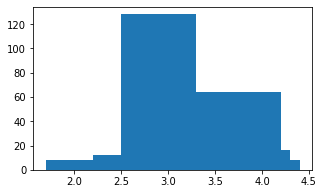

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3)) # создаем полотно заданного размера
ax.bar(df['Min Clock'], df['L3 Cache (MB)'])

In [ ]:
import seaborn as sns

KeyboardInterrupt: ignored

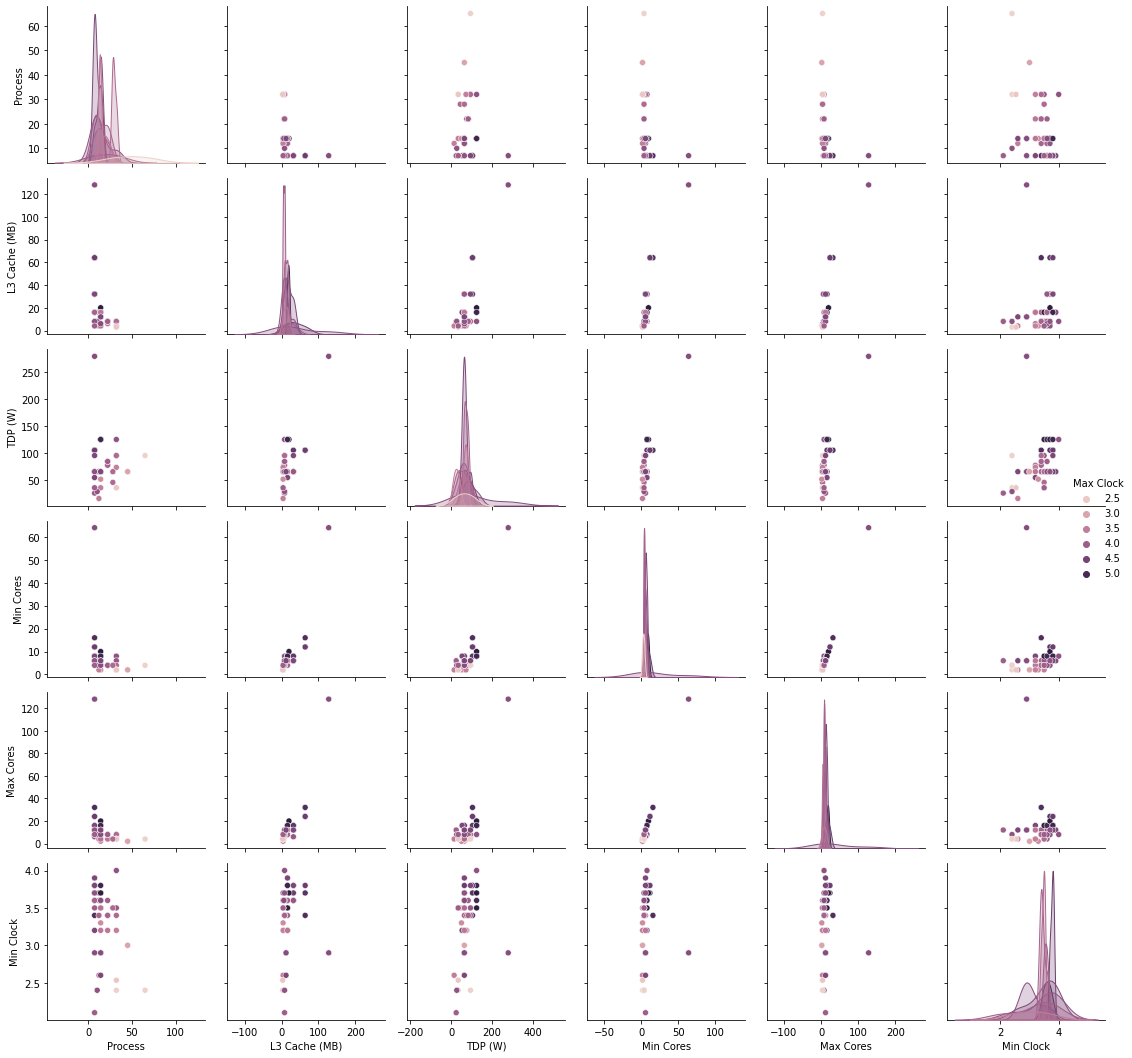

In [ ]:
sns.pairplot(df, hue='Max Clock')

In [ ]:
import random

In [ ]:
mean = sum(df['L3 Cache (MB)'])/len(df['L3 Cache (MB)'])
mean

nan

In [ ]:
import numpy as np

In [ ]:
np.sum(df['L3 Cache (MB)'])

840.0

In [ ]:
df['L3 Cache (MB)'] = df['L3 Cache (MB)'].fillna(np.sum(df['L3 Cache (MB)'])/len(df['L3 Cache (MB)']))

In [ ]:
type(df['Name'][0])

str

In [ ]:
for x in df.columns:
  if type(df[x][0]) != str:
    df[x] = df[x].fillna(np.sum(df[x])/len(df[x]))

In [ ]:
rnd = [x for x in range(len(df['Name']))]
random.shuffle(rnd)
df.iloc[rnd]
df_train = df.iloc[rnd[:len(df)*80//100]]
df_test = df.iloc[rnd[:len(df)*20//100]]
y_train = df_train['Max Cores']
x_train = df_train
del x_train['Max Cores']
del x_train['Name']
del x_train['Codename']
del x_train['Socket']
del x_train['Released']
y_test = df_test['Max Cores']
x_test = df_test
del x_test['Max Cores']
del x_test['Name']
del x_test['Codename']
del x_test['Socket']
del x_test['Released']


In [ ]:
s = []
y_test1 = list(y_test)
for i in range(len(y_pred)):
  s.append([y_pred[i], y_test1[i]])
s.sort(key=lambda x: x[0])
new_y_pred = []
new_y_test = []
for x1, x2 in s:
  new_y_pred.append(x1)
  new_y_test.append(x2)
x = [x for x in range(len(s))]

In [ ]:
from sklearn.linear_model import LinearRegression # подключим модель линейной регрессии
linr = LinearRegression() # создадим ее
linr.fit(x_train, y_train) # обучим модель, принудительно переформатировав размеры массивов
print(f'Обученные параметры: b={linr.intercept_} a={linr.coef_}')

y_pred=linr.predict(x_test)# посчитаем выход модели

Обученные параметры: b=1.1920037085579356 a=[-0.06010257  0.01187464  0.01229803  1.9133219  -0.9328423   0.36371055
  0.04919233]


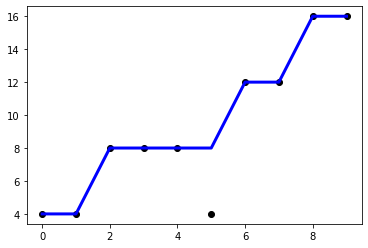

In [ ]:
plt.plot(x, new_y_pred, color='blue', linewidth=3)# нарисуем его 
plt.scatter(x, new_y_test,  color='black') # и желаемый
plt.show()

[Text(177.8625, 199.32, 'X[3] <= 5.0\ngini = 0.801\nsamples = 40\nvalue = [2, 10, 9, 9, 7, 1, 1, 1]'),
 Text(125.55000000000001, 163.07999999999998, 'X[5] <= 3.85\ngini = 0.58\nsamples = 21\nvalue = [2, 10, 9, 0, 0, 0, 0, 0]'),
 Text(83.7, 126.83999999999999, 'X[2] <= 86.0\ngini = 0.403\nsamples = 12\nvalue = [2, 9, 1, 0, 0, 0, 0, 0]'),
 Text(62.775000000000006, 90.6, 'X[0] <= 38.5\ngini = 0.298\nsamples = 11\nvalue = [2, 9, 0, 0, 0, 0, 0, 0]'),
 Text(41.85, 54.359999999999985, 'X[6] <= 13.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9, 0, 0, 0, 0, 0, 0]'),
 Text(20.925, 18.119999999999976, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0, 0, 0, 0, 0, 0]'),
 Text(62.775000000000006, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(83.7, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(104.625, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0]'),
 Text(167.4, 126.83999999999999, 'X[1] <= 5.0\ngini = 0.19

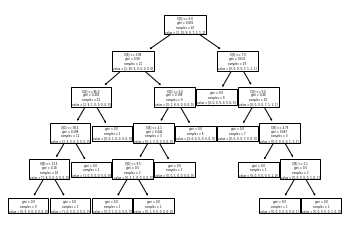

In [ ]:
from sklearn import tree # модуль для деревьев
clf = tree.DecisionTreeClassifier() # создаем классификатор на основе дерева
clf = clf.fit(x_train, y_train) # обучаем его, т.е. создаем само дерево
tree.plot_tree(clf) # отображаем

In [ ]:
import graphviz # подключаем библиотеку для отображения деревьев
dot_data = tree.export_graphviz(clf, out_file=None) # конвертируем в DOT (в переменную или в файл) 
graph = graphviz.Source(dot_data)  # загружаем дерево из переменной или файла в представление graphviz
graph.render("iris") # отображаем в файл (по умолчанию pdf)

'iris.pdf'

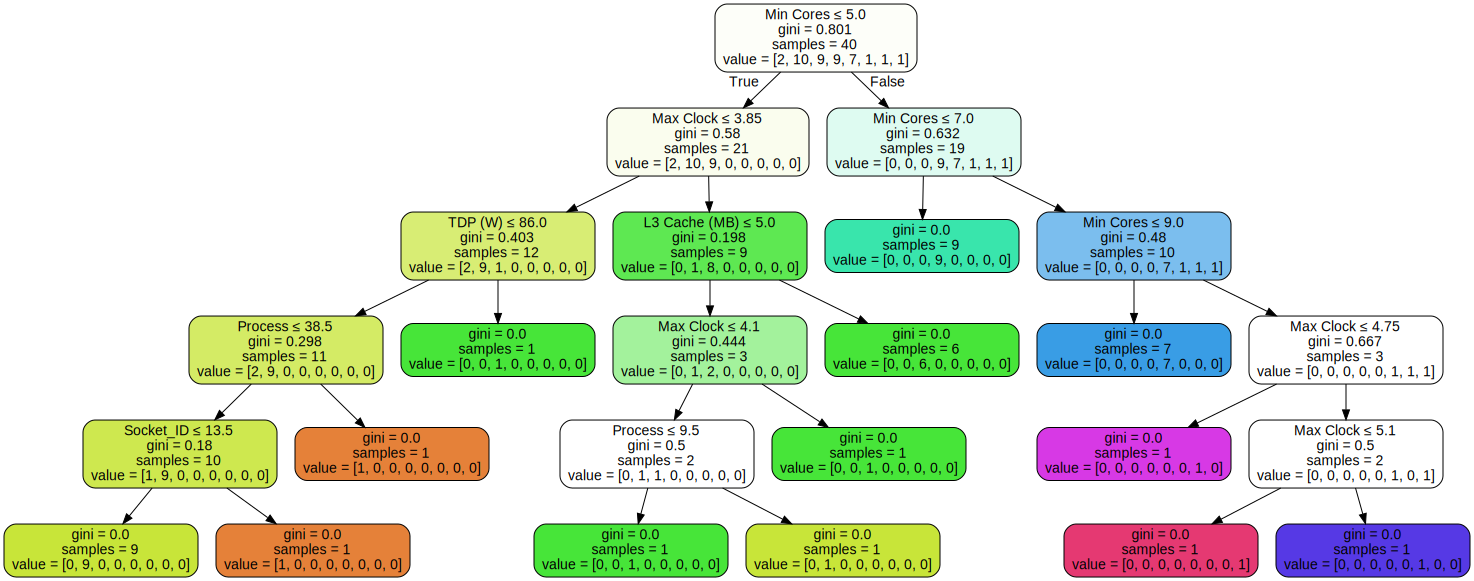

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,  # можем указать дополнительные опции конвертации
                     feature_names=x_train.columns, #  названия атрибутов
                     filled=True, rounded=True,  # прочие детали отображения
                     special_characters=True)  #
graph = graphviz.Source(dot_data)  # # загружаем дерево из переменной или файла в представление graphviz
graph  # отображаем на экране

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier # случайный лес

In [ ]:
# Создаем классификатор на основе случайного леса. Изменяйте параметры и смотрите как это влияет на обучение
clf = RandomForestClassifier(max_depth=3,# максимальная глубина дерева
                             n_estimators=5,# число деревьев в лесу
                             max_features=3)# максимальное число признаков для каждого дерева

clf.fit(x_train, y_train) # обучаем 

pred = clf.predict(x_test) # проверяем на тестовых данных

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average="macro")
precision = precision_score(y_test, pred, average="macro")
recall=recall_score(y_test, pred, average="macro")
print('Accuracy=',accuracy)
print('F1=',f1)
print('Precision=',precision)
print('Recall=',recall)

Accuracy= 0.9
F1= 0.9142857142857143
Precision= 0.9375
Recall= 0.9166666666666666
